<a href="https://colab.research.google.com/github/rodrigomouracbs/Python/blob/main/T%C3%A9cnicas_de_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Amostragem: Aleatória, Sistemática, Estratificada

**Amostragem Aleatória Simples**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/covid19.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50982 entries, 0 to 50981
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  50982 non-null  int64  
 2   age                 50982 non-null  object 
 3   sex                 50982 non-null  object 
 4   health_region       50982 non-null  object 
 5   province            50982 non-null  object 
 6   country             50982 non-null  object 
 7   date_report         50982 non-null  object 
 8   report_week         50982 non-null  object 
 9   has_travel_history  1150 non-null   object 
 10  locally_acquired    574 non-null    object 
 11  case_source         50982 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [ ]:
df.head()

In [ ]:
#Criando uma amostra com 1000 registros a partir do conjunto de dados
df_sample = df.sample(n=10)

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 34025 to 24876
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  1000 non-null   int64  
 2   age                 1000 non-null   object 
 3   sex                 1000 non-null   object 
 4   health_region       1000 non-null   object 
 5   province            1000 non-null   object 
 6   country             1000 non-null   object 
 7   date_report         1000 non-null   object 
 8   report_week         1000 non-null   object 
 9   has_travel_history  28 non-null     object 
 10  locally_acquired    13 non-null     object 
 11  case_source         1000 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 101.6+ KB


In [ ]:
import seaborn as sns

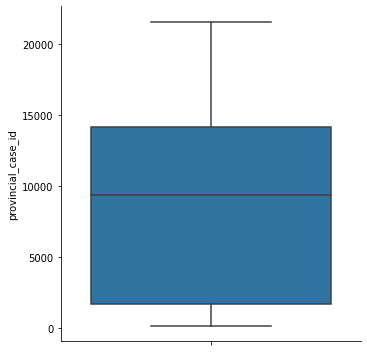

In [ ]:
sns.catplot(y='provincial_case_id', kind='box', data=df_sample)

In [ ]:
#Especificando o tamanho da amostra através do percentual
df_sample = df.sample(frac=0.10)

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 31122 to 5254
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  5098 non-null   int64  
 2   age                 5098 non-null   object 
 3   sex                 5098 non-null   object 
 4   health_region       5098 non-null   object 
 5   province            5098 non-null   object 
 6   country             5098 non-null   object 
 7   date_report         5098 non-null   object 
 8   report_week         5098 non-null   object 
 9   has_travel_history  112 non-null    object 
 10  locally_acquired    55 non-null     object 
 11  case_source         5098 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 517.8+ KB


**Amostragem Aleatória Estratificada**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['province'].value_counts()

Quebec           25757
Ontario          16337
Alberta           4850
BC                2053
Nova Scotia        915
Saskatchewan       366
Manitoba           272
NL                 258
New Brunswick      118
PEI                 27
Repatriated         13
Yukon               11
NWT                  5
Name: province, dtype: int64

In [ ]:
#Gerando amostra estratificada
X_train, X_test, y_train, y_test = train_test_split(df.drop('province', axis=1),
                                                    df['province'],
                                                    stratify=df['province'],
                                                    test_size=0.2)

In [ ]:
#Verificando a forma dos dados
y_test.shape

(10197,)

In [ ]:
y_test.value_counts()

Quebec           5152
Ontario          3267
Alberta           970
BC                411
Nova Scotia       183
Saskatchewan       73
Manitoba           54
NL                 52
New Brunswick      24
PEI                 5
Repatriated         3
Yukon               2
NWT                 1
Name: province, dtype: int64

**Amostragem Sistemática**

In [ ]:
#Gerando a semente aleatória
import numpy as np
semente = np.random.choice(10,1)#Seleciona um número aleatório entre 1 e 10


In [ ]:
semente

array([3])

In [ ]:
#Gerando o índice a partira da semente
indices = np.arange(0,100,semente)#Gera amostra de 100 elementos com passo = a semente

In [ ]:
indices

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

In [ ]:
#Gerando a amostra a partir do índice
amostra = df.loc[indices,:]

In [ ]:
amostra

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
6,NaN,4,30-39,Female,Vancouver Coastal,BC,Canada,2020-02-06,2020-02-02,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...
9,NaN,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23,2020-02-23,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...
12,NaN,6,60-69,Male,Toronto,Ontario,Canada,2020-02-27,2020-02-23,f,Close Contact,(1) https://news.ontario.ca/mohltc/en/2020/02/...
15,NaN,8,80-89,Male,Toronto,Ontario,Canada,2020-02-28,2020-02-23,t,NaN,https://news.ontario.ca/mohltc/en/2020/02/onta...
18,NaN,11,60-69,Male,Durham,Ontario,Canada,2020-02-29,2020-02-23,f,Close Contact,https://news.ontario.ca/mohltc/en/2020/02/onta...
21,NaN,13,40-49,Male,York,Ontario,Canada,2020-03-01,2020-03-01,t,NaN,https://news.ontario.ca/mohltc/en/2020/03/onta...
24,NaN,16,60-69,Female,York,Ontario,Canada,2020-03-03,2020-03-01,t,NaN,https://toronto.ctvnews.ca/three-new-cases-of-...
27,NaN,19,70-79,Female,York,Ontario,Canada,2020-03-03,2020-03-01,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/03/...


In [ ]:
#Contagem de registros
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 99
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  34 non-null     int64  
 2   age                 34 non-null     object 
 3   sex                 34 non-null     object 
 4   health_region       34 non-null     object 
 5   province            34 non-null     object 
 6   country             34 non-null     object 
 7   date_report         34 non-null     object 
 8   report_week         34 non-null     object 
 9   has_travel_history  34 non-null     object 
 10  locally_acquired    9 non-null      object 
 11  case_source         34 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.5+ KB


# Medidas de Posição e Tendência Central

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [ ]:
from scipy.stats.mstats import gmean,hmean
from scipy import stats

In [ ]:
dados = [1,2,5,3,4]

In [ ]:
np.mean(dados)

3.0

In [ ]:
gmean(dados)

2.6051710846973517

In [ ]:
hmean(dados)

2.18978102189781

In [ ]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [ ]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [ ]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

In [ ]:
dados_linear = [1,4,7,10,13,16,19]

In [ ]:
media = int(np.mean(dados_linear))

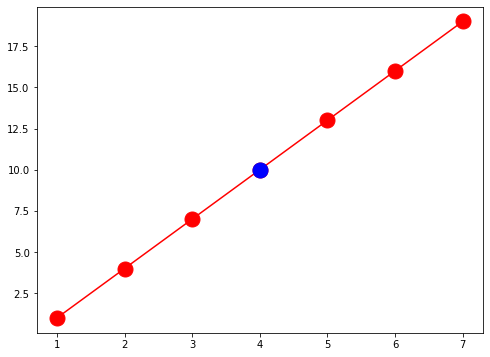

In [ ]:
plot_lines(dados_linear, media)

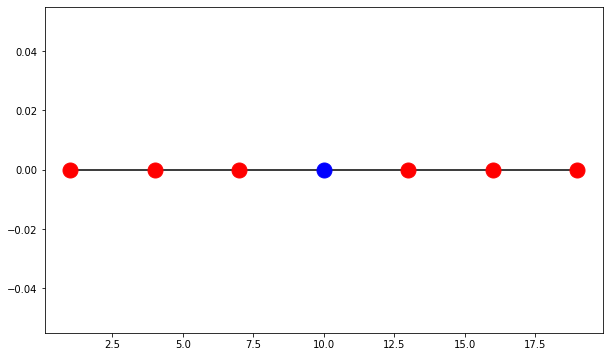

In [ ]:
plot_lines_horizontal(dados_linear, media)

In [ ]:
dados_exponencial=[1, 3, 9, 27, 81, 243, 729]

In [ ]:
media = int(np.mean(dados_exponencial))

In [ ]:
print('Valor da média aritmética: {}'.format(media))

Valor da média aritmética: 156


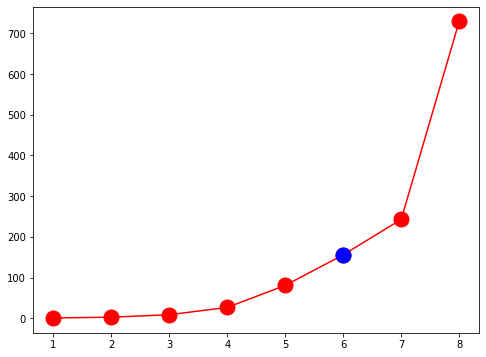

In [ ]:
plot_lines(dados_exponencial, media)

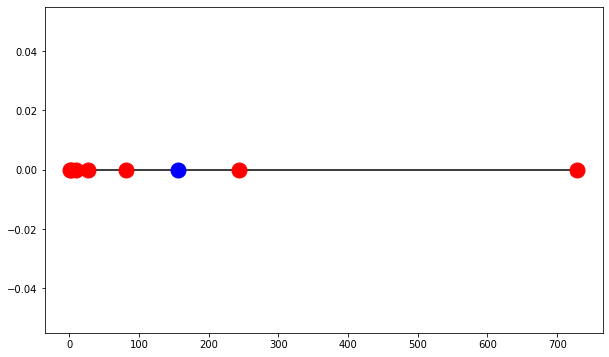

In [ ]:
plot_lines_horizontal(dados_exponencial, media)

In [ ]:
media_geo = int(gmean(dados_exponencial))

In [ ]:
print('Valor da média geométrica: {}'.format(media_geo))

Valor da média geométrica: 33


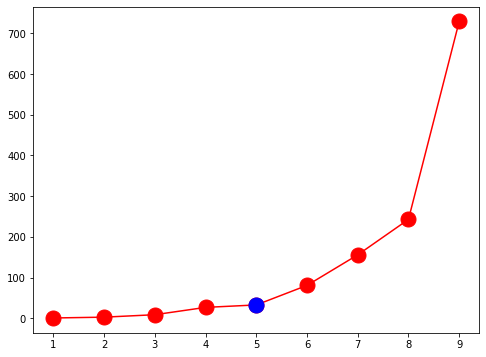

In [ ]:
plot_lines(dados_exponencial, media_geo)

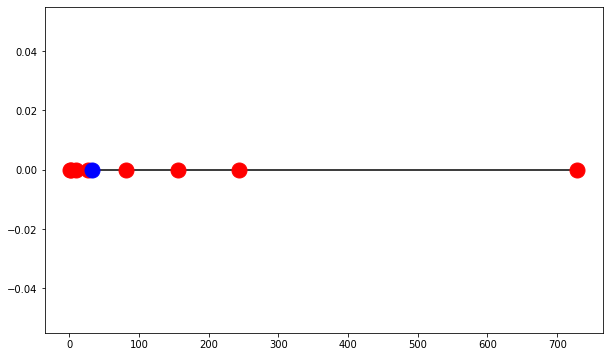

In [ ]:
plot_lines_horizontal(dados_exponencial, media_geo)

# Comparando as Médias em um Cenário Real

**Calculando a média aritmética**

In [ ]:
aval_gramado,aval_curitiba = 3.5,4.5
indice_gramado,indice_curitiba =89,75

In [ ]:
print("Média para Gramado: {}".format(np.mean([aval_gramado,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba,indice_curitiba])))

Média para Gramado: 46.25
Média para Curitiba: 39.75


**Reescalonando os dados de avaliação para os dados de índice de satisfação**

In [ ]:
print("Valores reescalonados: {},{}".format(aval_gramado*20,aval_curitiba*20))

Valores reescalonados: 70.0,90.0


In [ ]:
print("Média para Gramado: {}".format(np.mean([aval_gramado*20,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba*20,indice_curitiba])))

Média para Gramado: 79.5
Média para Curitiba: 82.5


In [ ]:
#Mesmo cenário com a média geométrica
print("Média para Gramado: {}".format(gmean([aval_gramado,indice_gramado])))
print("Média para Curitiba: {}".format(gmean([aval_curitiba,indice_curitiba])))

Média para Gramado: 17.64936259472279
Média para Curitiba: 18.371173070873837


Percurso total da viagem 10 km
*   Caminho de ida = 30 km/h
*   Caminho de volta = 10 km/h



In [ ]:
#Usando a média aritmética
np.mean([30,10])

20.0

In [ ]:
#Média aritmética ponderada
np.average([30,10], weights=[.25, .75])

15.0

In [ ]:
hmean([30,10])

15.0

# Moda e Mediana

**Dados com relacionamento aditivo**

In [ ]:
dados = [1,4,7,10,13,16,19] #round = arredondamento

In [ ]:
media_aritmetica,media_geometrica,media_harmonica=round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [ ]:
media_aritmetica,media_geometrica,media_harmonica

(10.0, 7.3, 4.15)

Dados: [1, 4, 4.15, 7, 7.3, 10, 10.0, 13, 16, 19]
Media aritmética: 10.0, Média Geométrica: 7.3, Média Harmonica: 4.15


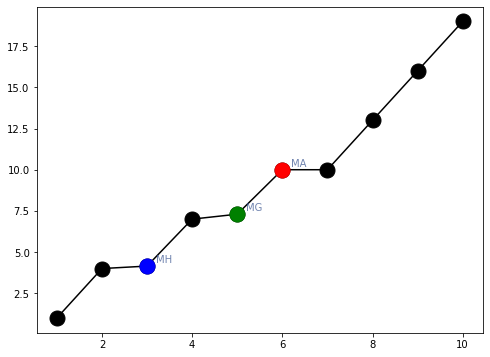

In [ ]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

**Dados com relacionamento multiplicativo**

In [ ]:
dados=[1,3,9,27,81,243,729]

In [ ]:
media_aritmetica,media_geometrica,media_harmonica=round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [ ]:
media_aritmetica,media_geometrica,media_harmonica

(156.14, 27.0, 4.67)

Dados: [1, 3, 4.67, 9, 27, 27.0, 81, 156.14, 243, 729]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


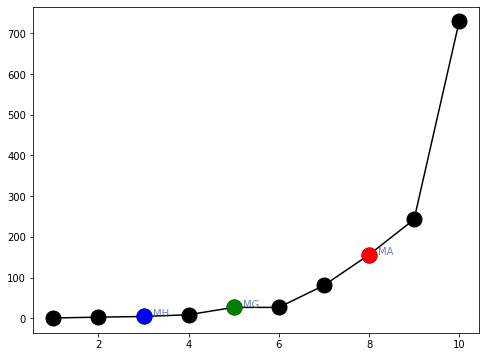

In [ ]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

**Moda - Valores mais frequentes da distribuição**

In [ ]:
dados = [4,5,4,6,5,8,4]

In [ ]:
stats.mode(dados)

ModeResult(mode=array([4]), count=array([3]))

In [ ]:
dados_bimodal=[4,5,4,6,5,8,4,4,5,5]

In [ ]:
from collections import Counter

In [ ]:
def calcula_moda(dados):
  number_counts=Counter(dados)
  print(number_counts)
  modes=[val for val, count in number_counts.items() if count == max(number_counts.values())]
  return modes

In [ ]:
calcula_moda(dados_bimodal)

Counter({4: 4, 5: 4, 6: 1, 8: 1})


[4, 5]

In [ ]:
dados_amodal=[1,2,3,4,5]

In [ ]:
calcula_moda(dados_amodal)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})


[1, 2, 3, 4, 5]

In [ ]:
dados_mediana7=[7,1,5,2,3,1,6]

In [ ]:
np.sort(dados_mediana7)

array([1, 1, 2, 3, 5, 6, 7])

In [ ]:
np.median(dados_mediana7)

3.0

In [ ]:
dados_mediana8 = [1,2,1,1,4,5,3,6]

In [ ]:
np.sort(dados_mediana8)

array([1, 1, 1, 2, 3, 4, 5, 6])

In [ ]:
np.median(dados_mediana8)

2.5